In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/africa-nuclear-and-e-waste-dataset/toxic_waste_dataset_cleaned.csv


# Exploratory Data Analysis (EDA) on Toxic Waste and Nuclear Waste Datasets
In this notebook, we will perform an exploratory data analysis (EDA) on this dataset:
.
- **Toxic Waste Dumping in Africa Dataset**: Contains data on the locations and types of toxic waste dumping activities.

We will load, clean, and visualize the data to better understand the patterns and insights.


This toxic and nuclear waste analysis project has several powerful applications in both environmental science and business, including:

1. Environmental Monitoring & Policy Enforcement
Regulatory Compliance: Helps governments and environmental agencies track illegal waste dumping.

Impact Assessment: Identifies high-risk areas for pollution and long-term environmental damage.

Greenpeace & NGOs: Supports advocacy groups in monitoring waste disposal trends.

2. Business & Investment Applications
Risk Assessment for Companies: Industries dealing with waste disposal can use the insights to avoid legal risks.

Insurance & Real Estate: Insurers and property developers can assess environmental risks before investments.

3. Predictive Insights for Future Waste Dumping
Machine Learning Predictions: The trained model can forecast high-risk locations for future illegal waste dumping.

Proactive Cleanup Planning: Helps authorities allocate resources efficiently for cleanup efforts.

4. Data Journalism & Public Awareness
Interactive Maps for Reports: Your visualizations can be used by journalists and researchers to tell data-driven stories.

Educational Use: Universities and researchers can integrate the findings into sustainability studies.

5. Legal & Criminal Investigations
Tracking Ships & Companies: Identifying recurring offenders in illegal waste transport.

Evidence in Court Cases: Your AI model could support legal actions against environmental crimes.

First few rows of the dataset:
    ID                                              Title  \
0  1.0                     Toxic Waste Dumping in Somalia   
1  2.0                      Trafigura Toxic Waste Scandal   
2  3.0          A Ban on Dumping Radioactive Waste at Sea   
3  4.0     The True Cost of Nuclear Power in South Africa   
4  5.0  Nuclear Waste Dumping in Somalia: Claims and I...   

                                             Summary           Author/Source  \
0  Greenpeace uncovered illegal dumping along the...              Greenpeace   
1  Trafigura dumped hazardous waste in Abidjan, a...    Amnesty & Greenpeace   
2  37 nations agreed to ban radioactive waste dum...              Greenpeace   
3  Report on nuclear waste challenges in South Af...       Greenpeace Africa   
4  Study evaluates claims of radioactive waste of...  Transparency Solutions   

         Date                                                URL  \
0  1970-01-01     https://www.greenpeace.org/somalia-

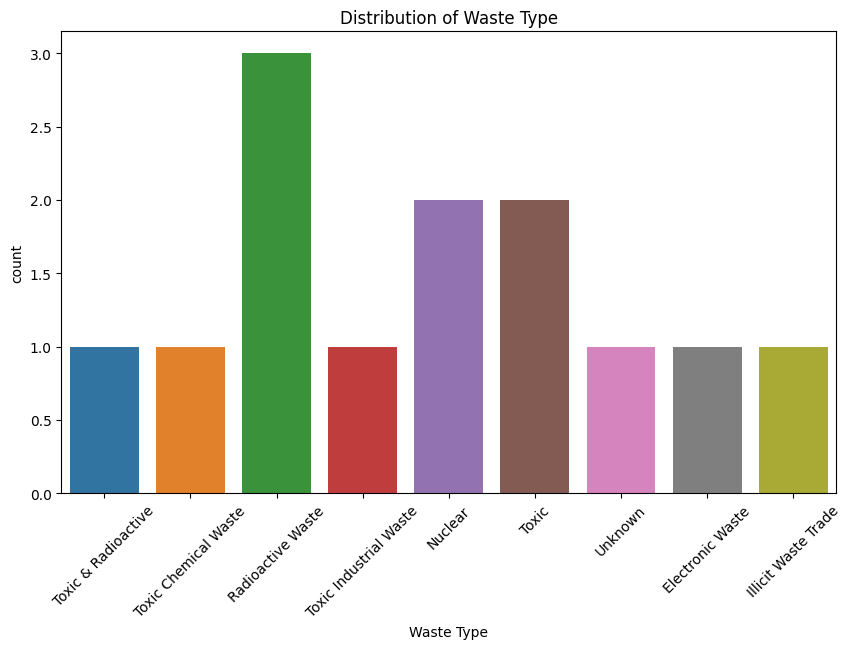

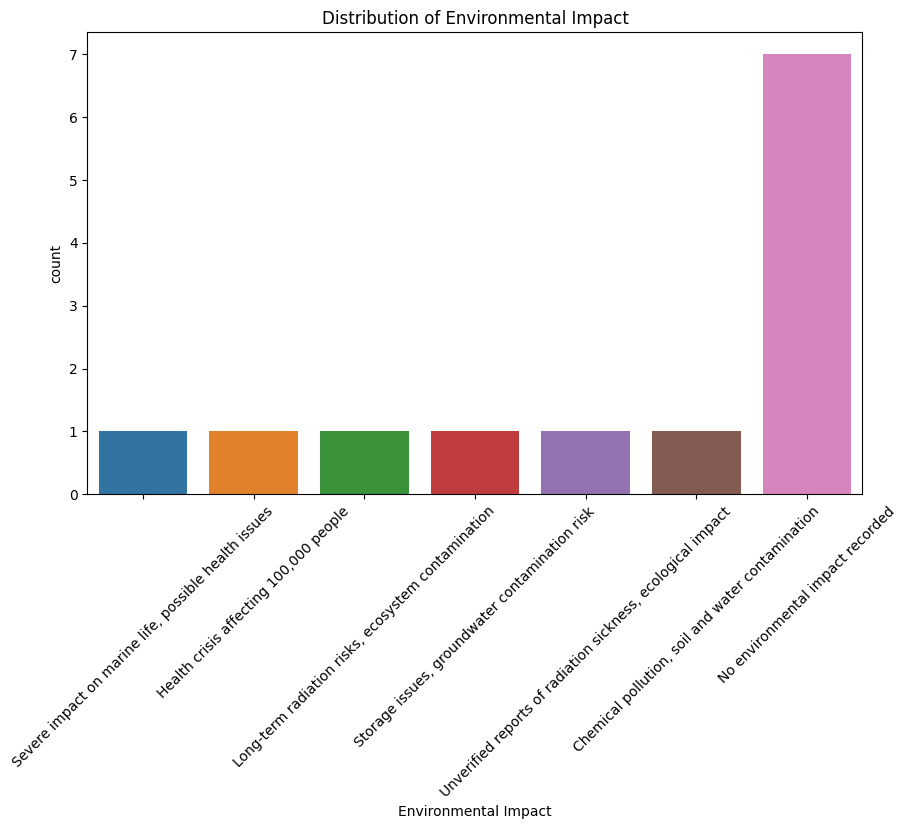


Cross-tabulation of Waste Type and Environmental Impact:
Environmental Impact    Chemical pollution, soil and water contamination  \
Waste Type                                                                 
Electronic Waste                                                       0   
Illicit Waste Trade                                                    0   
Nuclear                                                                0   
Radioactive Waste                                                      0   
Toxic                                                                  0   
Toxic & Radioactive                                                    0   
Toxic Chemical Waste                                                   0   
Toxic Industrial Waste                                                 1   
Unknown                                                                0   

Environmental Impact    Health crisis affecting 100,000 people  \
Waste Type                             

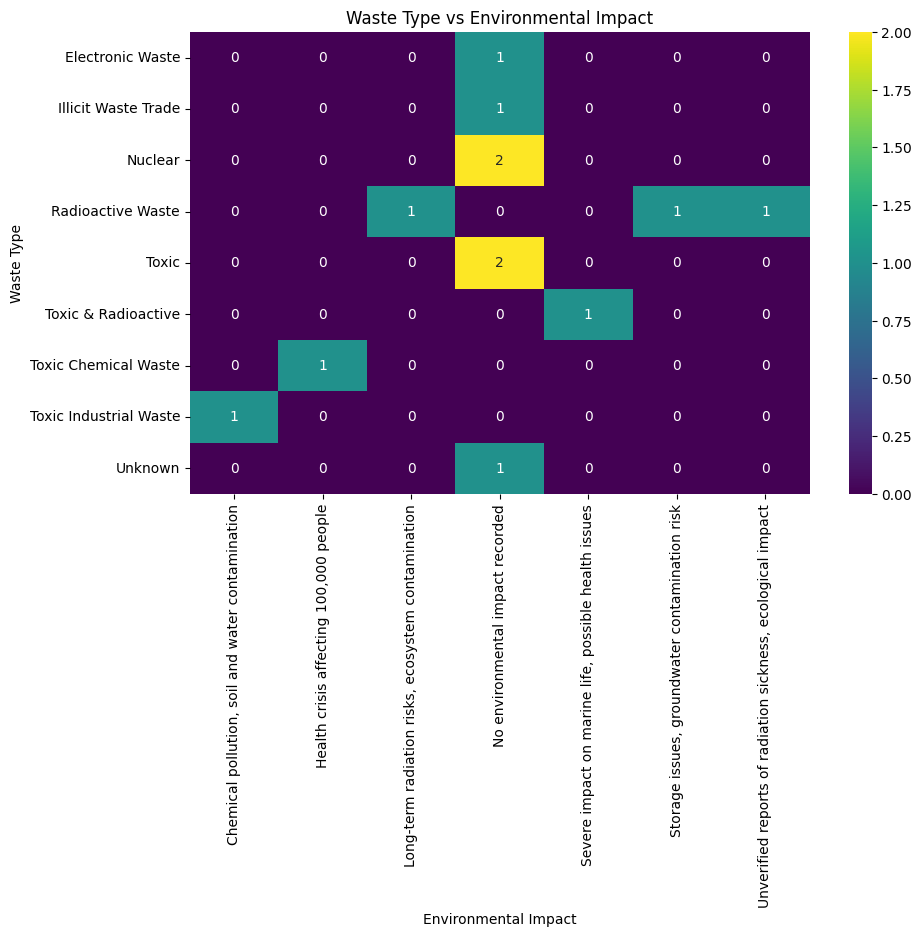

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


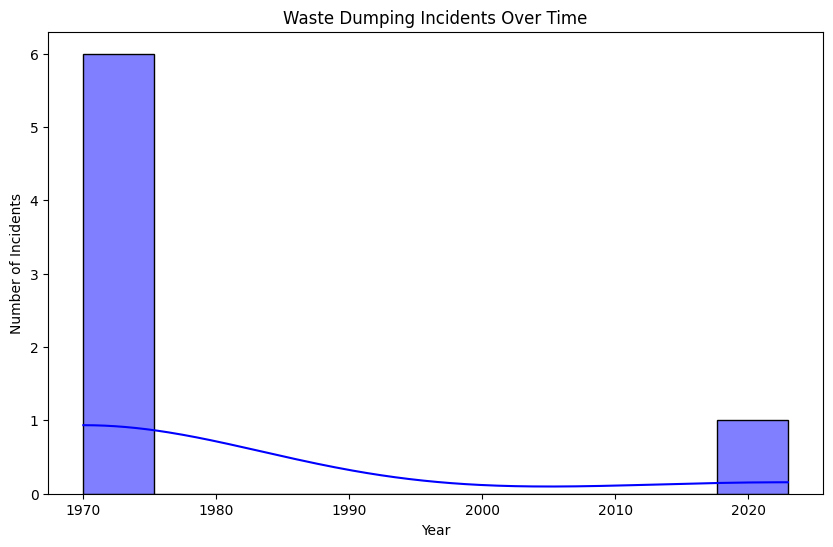


Geospatial map saved as 'waste_dumping_map.html'
Clustered geospatial map saved as 'clustered_waste_dumping_map.html'

One-hot encoded columns for 'Environmental Impact':
['Environmental Impact_Health crisis affecting 100,000 people', 'Environmental Impact_Long-term radiation risks, ecosystem contamination', 'Environmental Impact_No environmental impact recorded', 'Environmental Impact_Severe impact on marine life, possible health issues', 'Environmental Impact_Storage issues, groundwater contamination risk', 'Environmental Impact_Unverified reports of radiation sickness, ecological impact']

Model Accuracy: 1.0

Feature Importance:
               Feature  Importance
1            Longitude    0.459913
0             Latitude    0.176186
7              dumping    0.089787
12               waste    0.082682
10              somali    0.044422
9          radioactive    0.038433
3               africa    0.034311
4            available    0.032454
5           challenges    0.020843
11      

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/kaggle/input/africa-nuclear-and-e-waste-dataset/toxic_waste_dataset_cleaned.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check dataset info
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Univariate Analysis: Plot distribution of Waste Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Waste Type')
plt.xticks(rotation=45)
plt.title("Distribution of Waste Type")
plt.show()

# Univariate Analysis: Plot distribution of Environmental Impact
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Environmental Impact')
plt.xticks(rotation=45)
plt.title("Distribution of Environmental Impact")
plt.show()

# Bivariate Analysis: Cross-tabulation of Waste Type and Environmental Impact
print("\nCross-tabulation of Waste Type and Environmental Impact:")
print(pd.crosstab(df['Waste Type'], df['Environmental Impact']))

# Bivariate Analysis: Plot the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Waste Type'], df['Environmental Impact']), annot=True, fmt='d', cmap='viridis')
plt.title("Waste Type vs Environmental Impact")
plt.show()

# Temporal Analysis: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Temporal Analysis: Plot incidents over time
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year', bins=10, kde=True, color='blue')
plt.title("Waste Dumping Incidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

# Data Cleaning: Fill missing values in 'Estimated Waste Volume (tons)' with 'Unknown'
df['Estimated Waste Volume (tons)'] = df['Estimated Waste Volume (tons)'].fillna('Unknown')

# Data Cleaning: Drop rows with missing critical data (e.g., Latitude, Longitude)
df = df.dropna(subset=['Latitude', 'Longitude'])

# Data Cleaning: Convert 'Estimated Waste Volume (tons)' to numeric (if possible)
df['Estimated Waste Volume (tons)'] = df['Estimated Waste Volume (tons)'].astype(str).str.extract('(\d+)').astype(float)

# Data Cleaning: Remove duplicates
df = df.drop_duplicates()

# Save the original 'Waste Type' column for visualization
df['Waste Type Original'] = df['Waste Type']

# Data Cleaning: Encode categorical variables
df = pd.get_dummies(df, columns=['Waste Type', 'Environmental Impact'], drop_first=True)

# Geospatial Analysis: Create a map centered on Africa
m = folium.Map(location=[0, 20], zoom_start=4)

# Geospatial Analysis: Add markers for each dumping location
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Location']}: {row['Waste Type Original']}",
        icon=folium.Icon(color='red')
    ).add_to(m)

# Geospatial Analysis: Display the map
m.save('waste_dumping_map.html')
print("\nGeospatial map saved as 'waste_dumping_map.html'")

# Geospatial Analysis: Perform KMeans clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Latitude', 'Longitude']])

# Suppress KMeans warning by setting n_init explicitly
kmeans = KMeans(n_clusters=3, n_init=10)  # Set n_init explicitly
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Geospatial Analysis: Plot clusters on the map
m = folium.Map(location=[0, 20], zoom_start=4)
colors = ['red', 'blue', 'green']
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cluster {row['Cluster']}",
        icon=folium.Icon(color=colors[row['Cluster']])
    ).add_to(m)
m.save('clustered_waste_dumping_map.html')
print("Clustered geospatial map saved as 'clustered_waste_dumping_map.html'")

# Feature Engineering: Extract keywords from 'Summary'
# Remove stopwords to improve keyword extraction
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df['Summary'].fillna(''))
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, keywords_df], axis=1)

# Feature Engineering: Create a binary feature for 'Legal Actions'
df['Legal Action Taken'] = df['Legal Actions'].apply(lambda x: 1 if x != 'No legal action' else 0)

# Modeling: Define features and target
# Check the one-hot encoded columns for 'Environmental Impact'
print("\nOne-hot encoded columns for 'Environmental Impact':")
print([col for col in df.columns if 'Environmental Impact' in col])

# Select the first one-hot encoded column as the target variable
target_column = [col for col in df.columns if 'Environmental Impact' in col][0]
y = df[target_column]

# Define features
X = df[['Latitude', 'Longitude', 'Legal Action Taken'] + list(keywords_df.columns)]

# Modeling: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling: Train a Random Forest model with limited complexity to avoid overfitting
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Modeling: Evaluate the model
print("\nModel Accuracy:", model.score(X_test, y_test))

# Modeling: Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

In [3]:
import pandas as pd
import folium
from sklearn.cluster import KMeans
from IPython.display import display

# Load the dataset using the correct file path
file_path = "/kaggle/input/africa-nuclear-and-e-waste-dataset/toxic_waste_dataset_cleaned.csv"
df = pd.read_csv(file_path)

# Drop rows with missing latitude/longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

# Convert Latitude and Longitude to numeric types
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows with invalid latitude/longitude values (if any)
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a Folium map centered around Africa
m = folium.Map(location=[0, 20], zoom_start=4)

# Add markers for waste dumping locations
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Location']}: {row['Waste Type']}",
        icon=folium.Icon(color='red')
    ).add_to(m)

# Display the map in the notebook
print("Map of Waste Dumping Locations:")
display(m)

# Perform KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Create a clustered map
m_clustered = folium.Map(location=[0, 20], zoom_start=4)
colors = ['red', 'blue', 'green']

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cluster {row['Cluster']}",
        icon=folium.Icon(color=colors[row['Cluster']])
    ).add_to(m_clustered)

# Display the clustered map
print("\nClustered Map of Waste Dumping Locations:")
display(m_clustered)

Map of Waste Dumping Locations:



Clustered Map of Waste Dumping Locations:
